# THE FETCHER

The Fetcher a full desicion making from data application with every step till the decision making :
in the module of "traitement et visualisation de donnee" aka data visualisation and treatment we asked to make a full application that takes a data from any source (API, Web Scrapping, .csv or .xls, from a embedded system) and clean it analyse it visulalise it and at the end make a desicion out of the analysis of the selected data.

## > chosen data

in this project we found multipe data sources like :
* API
* WS(Web Scrapping)
* .csv/.xls file
* captors
...

and after thourough search we found that the best we can find is:
#### a non cleaned .csv file.
### why the .csv ?
1. for big data analysis : .csv files can hold up to infinite data sizes depends on the dataset.
2. easy access : in contrast of APIs where you need keys and access .csv files are everywhere and accessible by everyone who has the file.
3. simple to analyse : python frameworks like numpy, pandas have builtins that already turns csv files to a pandas dataframe and simply manipulate the data in the file. 

## THE CHOSEN DATASET
in the search of the datasets to use in this project our main goal is to look for 3 main criteria :
- uncleaned big dataset : to go with the cleaning process we needed somehow a mid->big dataset that we can opperate on you may ask why? that is because when we delete duplicates NULL values and incoherent data we need to still have an extentive and versatile data to analyse it.
- meaningfull : we were looking for some data that has value that we can make desiscions out of it.
- versatile : multiple column with diverse values and modalities.

after we scrapped every open datasets website we found 3 candidates :
1. Unclean Airline Customer Dataset : https://www.kaggle.com/datasets/edisugiarto/unclean-airline-customer-dataset/data
2. Uncleaned Laptop Price dataset :https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset
3. Customer Transactions Dataset :https://www.kaggle.com/datasets/mohammedarfathr/customer-transactions-dataset

no wonder why we found them all in kaggle :)
after some digging we were conviced that the first one (Unclean Airline Customer Dataset) is the best of them. why? multiple values, 23 columns, XXXX rows. it is what we needed for the treatment.

# IMPORT LIBRARIES
* pandas for dataframes and numpy tableaux
* numpy for data manipulation
* plt for visualisation
* seaborn for visualisation

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string

data = pd.read_csv("flight.csv")


In [354]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
#pd.set_option('display.max_rows', None)

# SHOWING THE DATASET

In [355]:
print(data.dtypes)
print("shape of our data (rows, column):",data.shape)

MEMBER_NO              int64
FFP_DATE              object
FIRST_FLIGHT_DATE     object
GENDER                object
FFP_TIER               int64
WORK_CITY             object
WORK_PROVINCE         object
WORK_COUNTRY          object
AGE                  float64
LOAD_TIME             object
FLIGHT_COUNT           int64
BP_SUM                 int64
SUM_YR_1             float64
SUM_YR_2             float64
SEG_KM_SUM             int64
LAST_FLIGHT_DATE      object
LAST_TO_END            int64
AVG_INTERVAL         float64
MAX_INTERVAL           int64
EXCHANGE_COUNT         int64
avg_discount         float64
Points_Sum             int64
Point_NotFlight        int64
dtype: object
shape of our data (rows, column): (62988, 23)


In [356]:
print(data.head(10))

   MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008    Male         6            .   
1      28065  2/19/2007          8/3/2007    Male         6          NaN   
2      55106   2/1/2007         8/30/2007    Male         6            .   
3      21189  8/22/2008         8/23/2008    Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009    Male         6      guiyang   
5      56972  2/10/2008         9/29/2009    Male         6    guangzhou   
6      44924  3/22/2006         3/29/2006    Male         6  wulumuqishi   
7      22631   4/9/2010          4/9/2010  Female         6   wenzhoushi   
8      32197   6/7/2011          7/1/2011    Male         5       DRANCY   
9      31645   7/5/2010          7/5/2010  Female         6      wenzhou   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  SUM_YR_1  \
0       beijing           CN 31.00  3/31/2014           210  505308 239560.00   
1

# I- DATA CLEANING
in the data cleaning process we need to clean data to make it ready for manipulation 
there are many tricks to do that(remove duplicates, remove null value row or column depends on the null density, linear regression to fill up the null value ...).

1. removing duplicates :

Pandas drop_duplicates() method helps in removing duplicates from the Pandas Dataframe allows to remove duplicate rows from a DataFrame, either based on all columns or specific ones in python.

In [357]:
print(data.duplicated().sum)
print("number of rows before dropping duplicates" , len(data))
data.drop_duplicates(keep='first',inplace=True)
print("number of rows after dropping duplicates" , len(data))

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
62983    False
62984    False
62985    False
62986    False
62987    False
Length: 62988, dtype: bool>
number of rows before dropping duplicates 62988
number of rows after dropping duplicates 62988


as you can see our data contains no duplicates wich is good for us.

2. removing null values if the column is important :

Now that we have a better understanding of how the data is structured we can move on to the nitty gritty of cleaning and begin by searching for any null values and handling them if present.

In [358]:
#printing the number of nulls
nulled = data.isnull()
print(nulled.sum())

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64


In [359]:
for col in data.columns :
    print(f"{col}: {data[col].unique()} unique values")
    print(f"{col}: {data[col].nunique()} unique values")

MEMBER_NO: [54993 28065 55106 ... 45690 61027 61340] unique values
MEMBER_NO: 62988 unique values
FFP_DATE: ['11/2/2006' '2/19/2007' '2/1/2007' ... '5/3/2009' '1/25/2010' '5/19/2009'] unique values
FFP_DATE: 3068 unique values
FIRST_FLIGHT_DATE: ['12/24/2008' '8/3/2007' '8/30/2007' ... '3/30/2014' '3/25/2014'
 '3/24/2014'] unique values
FIRST_FLIGHT_DATE: 3406 unique values
GENDER: ['Male' 'Female' nan] unique values
GENDER: 2 unique values
FFP_TIER: [6 5 4] unique values
FFP_TIER: 3 unique values
WORK_CITY: ['.' nan 'Los Angeles' ... 'BELLREGUARD' 'Danville' 'lingshui'] unique values
WORK_CITY: 3234 unique values
WORK_PROVINCE: ['beijing' 'CA' 'guizhou' ... 'NOTARIO' 'TOPKPPI' 'JAWATIMUR'] unique values
WORK_PROVINCE: 1165 unique values
WORK_COUNTRY: ['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX' 'CA' 'KR' 'PK' 'TH'
 'SG' 'BR' 'PE' 'AE' 'HN' 'PH' 'ID' 'MO' 'GN' 'FL' 'KH' nan 'TW' 'VN' 'DE'
 'IL' 'CH' 'PA' 'VT' 'EC' 'NG' 'BI' 'GT' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO'
 'CC' 'UV' 'MN' 'UK' 

In [360]:
print(list(data['WORK_PROVINCE'].unique()))


['beijing', 'CA', 'guizhou', 'guangdong', 'xinjiang', 'zhejiang', nan, 'PARIS', '.', 'CALIFORNIA', 'NORD BRABANT', 'FRANCE', 'guangdongsheng', 'hunan', 'TOKYO-TO', 'HK', 'Selangor Darul Ehsan', 'sichuan', 'fujian', 'VIC', 'shanghai', 'Noord-Holland', 'FR', 'zhongqing', 'guangxi', 'CA91030', 'ZUID HOLLAND', 'xianggang', 'jilin', 'ANDE', 'GA', 'NSW', 'LA', 'liaoning', 'hubei', 'NOORD HOLLAND', 'IIE DE FRANCE', '0', 'hubeisheng', 'FL', 'heilongjiang', 'henansheng', 'California', 'henan', 'ile de france', 'shanghaishi', 'anhui', 'OSAKAFU', 'SYDNEY', 'Osaka', 'KANGAWA', 'jilinsheng', 'guangzhou', 'SHIZUOKA-KEN', 'HYOGO', 'OKAYAMA', 'LIMBURG', 'NW', 'hebeisheng', 'Hong Kong', 'AU', 'Toyama-ken', 'neimenggu', 'heilongjiangsheng', 'aubervilliers', 'MARSEILLE', 'california', 'N.S.W', 'KANAGAWA-KEN', 'yunnan', '.beijing', 'xian', 'NARA', 'NEVADA', 'Gyeonggi-do', '92300', 'AUS', 'VA', 'liaoningsheng', 'guangxizhuangzuzi', 'shandong', 'Hyogo-ken', 'OSAKA', 'ca', 'HOKKAIDO', 'MAKASAN RATCHTEW1', 's

cleaning desicion after reading the data :
1. dropping 'WORK_CITY' datapoint we represent just the 'WORK_PROVINCE'
2. dropping null values from 'WORK_PROVINCE' or if it equals "."
3. 

In [361]:
data.drop(columns=["LOAD_TIME","WORK_PROVINCE","SUM_YR_2","Point_NotFlight"], inplace=True)
data = data[data["WORK_CITY"] != '.']
data.dropna(subset=["WORK_CITY","AGE","WORK_COUNTRY","SUM_YR_1","GENDER"],inplace=True)
data = data[~data["WORK_COUNTRY"].isin("中 沈 芬 北".split(" "))]
data = data[data["AGE"] < 80]
data = data[data["AGE"] > 18]
data = data[data["WORK_CITY"].str.match(r'^[A-Za-z ]+$', na=False)]
data = data[data["FIRST_FLIGHT_DATE"] != "12/31/1905"]
data["LAST_FLIGHT_DATE"] = pd.to_datetime(data["LAST_FLIGHT_DATE"], format='%m/%d/%Y', errors='coerce')

print(data.head(10))

    MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
3       21189   8/22/2008         8/23/2008    Male         5  Los Angeles   
4       39546   4/10/2009         4/15/2009    Male         6      guiyang   
5       56972   2/10/2008         9/29/2009    Male         6    guangzhou   
6       44924   3/22/2006         3/29/2006    Male         6  wulumuqishi   
7       22631    4/9/2010          4/9/2010  Female         6   wenzhoushi   
8       32197    6/7/2011          7/1/2011    Male         5       DRANCY   
9       31645    7/5/2010          7/5/2010  Female         6      wenzhou   
10      58877  11/18/2010        11/20/2010  Female         6        PARIS   
11      37994  11/13/2004         12/2/2004    Male         6      beijing   
12      28012  11/23/2006        11/18/2007    Male         5   SAN MARINO   

   WORK_COUNTRY   AGE  FLIGHT_COUNT  BP_SUM  SUM_YR_1  SEG_KM_SUM  \
3            US 64.00            23  337314 116350.00      281336   
4  

In [362]:
for col in data.columns :
    print(f"{col}: {data[col].unique()} unique values")
    print(f"{col}: {data[col].nunique()} unique values")
print(data.shape)
print(list(data['WORK_CITY'].unique()))

MEMBER_NO: [21189 39546 56972 ... 36041 45690 61027] unique values
MEMBER_NO: 57736 unique values
FFP_DATE: ['8/22/2008' '4/10/2009' '2/10/2008' ... '5/3/2009' '1/25/2010'
 '12/5/2004'] unique values
FFP_DATE: 3064 unique values
FIRST_FLIGHT_DATE: ['8/23/2008' '4/15/2009' '9/29/2009' ... '3/30/2014' '3/25/2014'
 '3/24/2014'] unique values
FIRST_FLIGHT_DATE: 3400 unique values
GENDER: ['Male' 'Female'] unique values
GENDER: 2 unique values
FFP_TIER: [5 6 4] unique values
FFP_TIER: 3 unique values
WORK_CITY: ['Los Angeles' 'guiyang' 'guangzhou' ... 'BELLREGUARD' 'Danville'
 'lingshui'] unique values
WORK_CITY: 2668 unique values
WORK_COUNTRY: ['US' 'CN' 'FR' 'HK' 'MY' 'NL' 'AU' 'MX' 'JP' 'CA' 'PK' 'SG' 'BR' 'PE'
 'PH' 'ID' 'MO' 'GN' 'FL' 'TW' 'VN' 'DE' 'IL' 'KR' 'CH' 'PA' 'KH' 'VT'
 'TH' 'EC' 'NG' 'BI' 'AE' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO' 'CC' 'UV' 'MN'
 'UK' 'AS' 'IT' 'OM' 'AN' 'SE' 'BZ' 'IN' 'KZ' 'NO' 'MS' 'FI' 'AT' 'HU'
 'AA' 'CY' 'EG' 'HN' 'UZ' 'ES' 'MZ' 'SW' 'NE' 'RE' 'PS' 'KE' 'SN' '

Create New Columns :

FFP_TO_FIRSTFLIGHT : Time from enrollement to First Flight (FIRST_FLIGHT_DATE - FFP_DATE)

In [363]:
data["FFP_TO_FIRSTFLIGHT"] = pd.to_datetime(data["FIRST_FLIGHT_DATE"]) -  pd.to_datetime(data["FFP_DATE"])
data["FFP_TO_FIRSTFLIGHT"] = data["FFP_TO_FIRSTFLIGHT"].dt.days.astype(int)
print(data["FFP_TO_FIRSTFLIGHT"])

3           1
4           5
5         597
6           7
7           0
         ... 
62982       0
62983     747
62984    1286
62985     247
62986       8
Name: FFP_TO_FIRSTFLIGHT, Length: 57736, dtype: int64


POINTS_SPENT : Total points Spent (Points_Sum - BP_SUM)

In [364]:
data["POINTS_SPENT"] = data["Points_Sum"] - data["BP_SUM"]
print(data["POINTS_SPENT"])

3         34890
4         64969
5         29783
6         50009
7         49334
          ...  
62982         0
62983     12318
62984    106972
62985         0
62986         0
Name: POINTS_SPENT, Length: 57736, dtype: int64


Visualisation des Données : 

Tous les fonctions qu on va utiliser pout afficher les graphes :

In [365]:
def Scatter(array1, array2, titre, xlabel, ylabel):
    plt.scatter(array1, array2, marker='o', color='blue', label='Données')
    plt.axhline(0, color='black', linewidth=1)  # Axe horizontal
    plt.axvline(0, color='black', linewidth=1)  # Axe vertical
    plt.title(titre)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def Histogramme(pd_data, bins, title, xlabel, ylabel):
    plt.hist(pd_data, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def Boxplot(pd_data):
    plt.boxplot(pd_data, patch_artist=True, notch=True, vert=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
    plt.title("Boxplot")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()

def Heatmap(array, x_labels, y_labels):
    fig, ax = plt.subplots()
    cax = ax.matshow(array, cmap='coolwarm')
    for (i, j), val in np.ndenumerate(array):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    fig.colorbar(cax)
    ax.set_xticks(range(len(x_labels)))
    ax.set_yticks(range(len(y_labels)))
    ax.set_xticklabels(x_labels, rotation=90)
    ax.set_yticklabels(y_labels)
    plt.show()
    
def Barchart(pd_data, title, xlabel, ylabel):
    plt.bar(pd_data.index, pd_data.values, color='blue', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
def PieChart(pd_data, title):
    plt.pie(pd_data, labels=pd_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')
    plt.show()
    
def TimePlot(pd_data, date_column, value_column, title, xlabel, ylabel):
    pd_data[date_column] = pd.to_datetime(pd_data[date_column])
    pd_data = pd_data.sort_values(by=date_column)
    plt.plot(pd_data[date_column], pd_data[value_column], marker='o', linestyle='-', color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

Histogramme : description

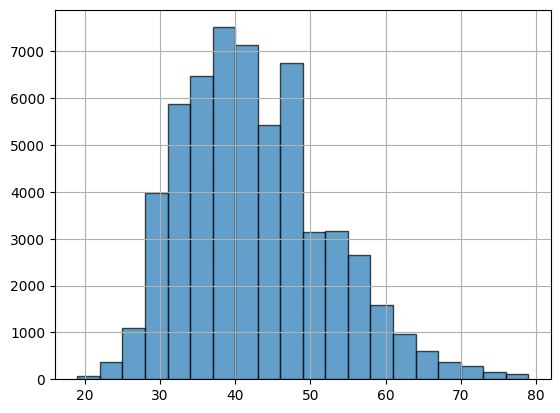

In [366]:
Histogramme(data["AGE"], 20, "", "", "")

Histogramme : description

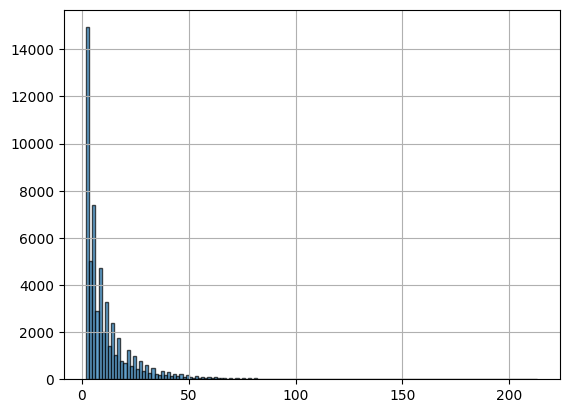

In [367]:
Histogramme(data["FLIGHT_COUNT"], len(data["FLIGHT_COUNT"].unique()), "", "", "")

Histogramme : description

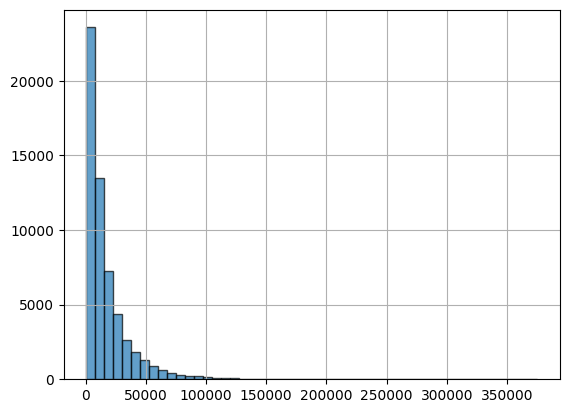

In [368]:
Histogramme(data["SEG_KM_SUM"], 50, "", "", "")

Histogramme : description

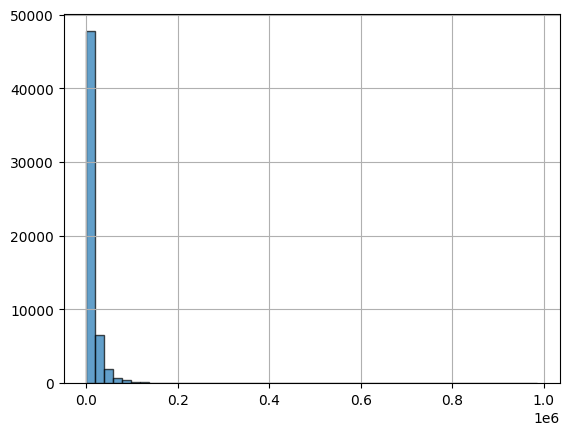

In [369]:
Histogramme(data["Points_Sum"], 50, "", "", "")

Histogramme : description

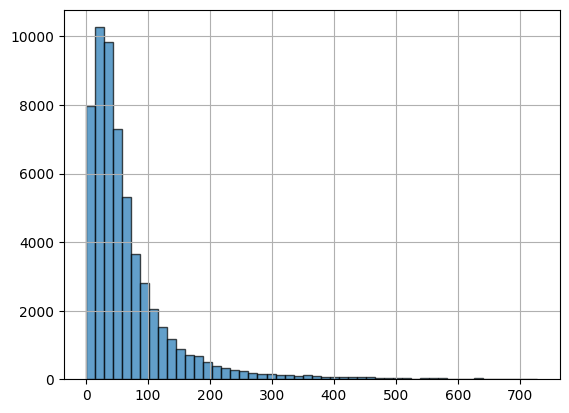

In [370]:
Histogramme(data["AVG_INTERVAL"], 50, "", "", "")

Histogramme : description

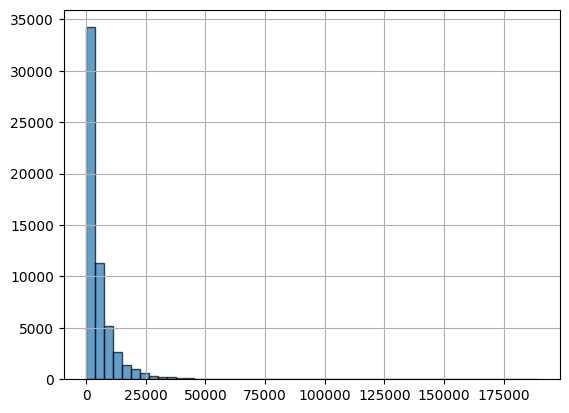

In [371]:
Histogramme(data["SUM_YR_1"], 50, "", "", "")

Matrice de Corrélation : description

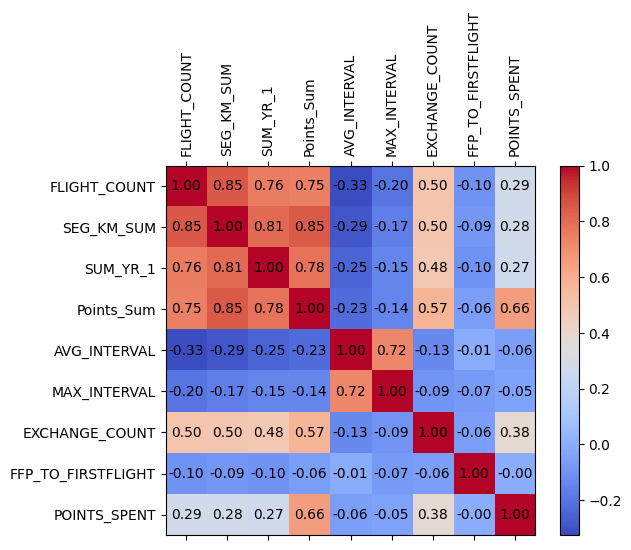

In [372]:
CorrelationData = pd.concat([data["FLIGHT_COUNT"], 
                             data["SEG_KM_SUM"], 
                             data["SUM_YR_1"], 
                             data["Points_Sum"], 
                             data["AVG_INTERVAL"], 
                             data["MAX_INTERVAL"], 
                             data["EXCHANGE_COUNT"], 
                             data["FFP_TO_FIRSTFLIGHT"],
                             data["POINTS_SPENT"]], axis=1)

Heatmap(CorrelationData.corr(), CorrelationData.columns, CorrelationData.columns)

Graphe de Points : descrption

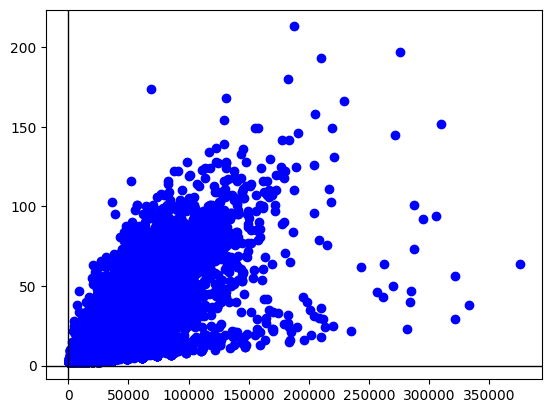

In [373]:
Scatter(data["SEG_KM_SUM"], data["FLIGHT_COUNT"], "", "", "")

Graphe de Points : descrption

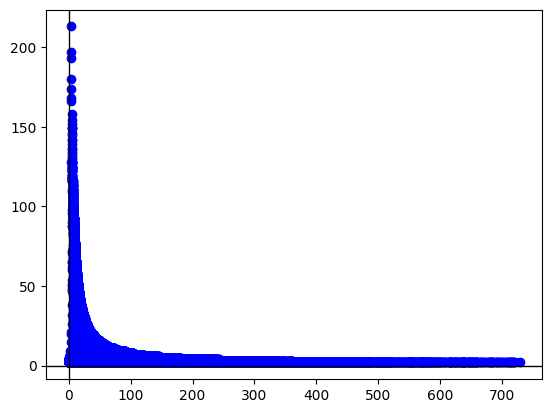

In [374]:
Scatter(data["AVG_INTERVAL"], data["FLIGHT_COUNT"], "", "", "")

Graphe de Points : descrption

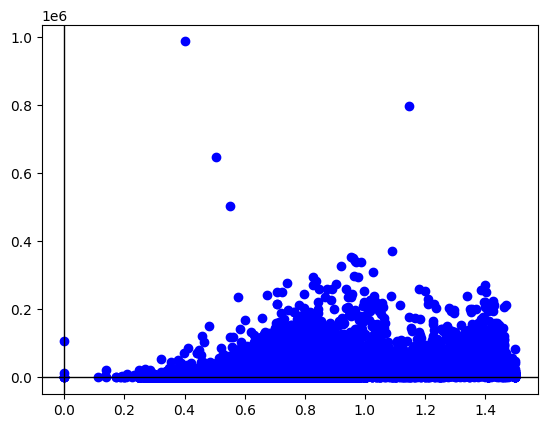

In [375]:
Scatter(data["avg_discount"], data["Points_Sum"], "", "", "")

Camembert : Gender

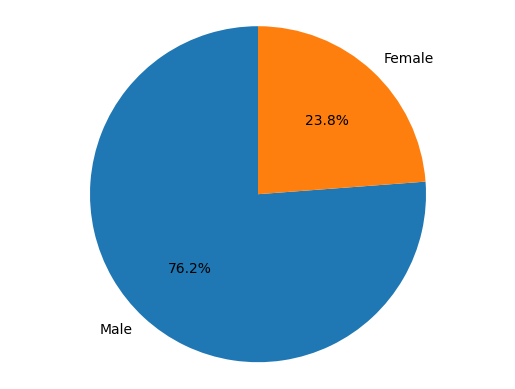

In [376]:
PieChart(data["GENDER"].value_counts(), "")

Diagramme de Barre : description

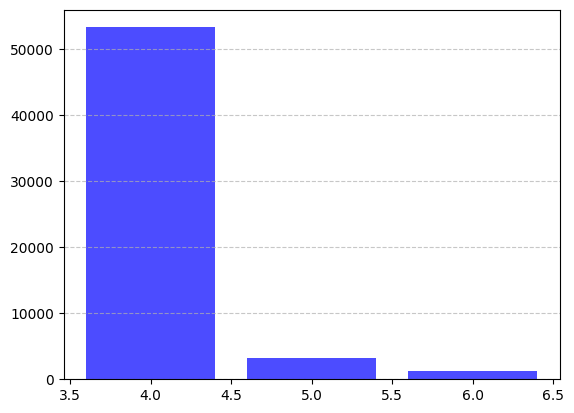

In [377]:
FFP_TierCount = pd.value_counts(data["FFP_TIER"], sort=True)
Barchart(FFP_TierCount, "", "", "")

Diagramme de Barre : description

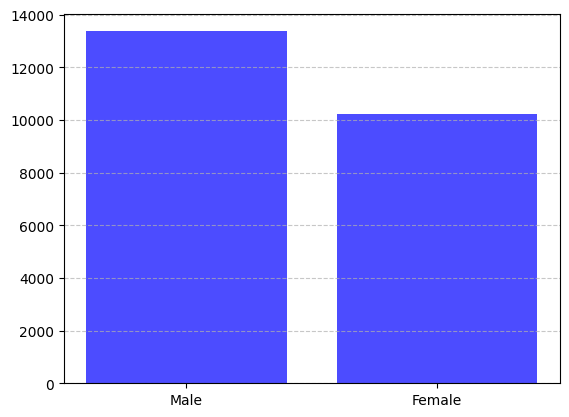

In [378]:
Moy_Points_Sum_by_Gender = pd.concat([data["Points_Sum"], data["GENDER"]], axis=1).groupby("GENDER")["Points_Sum"].mean().sort_values(ascending=False)
Barchart(Moy_Points_Sum_by_Gender, "", "", "")

Diagramme de Barre : Average Points_Sum by GENDER or WORK_COUNTRY

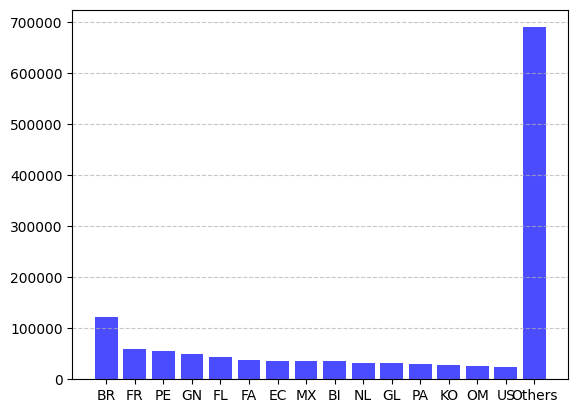

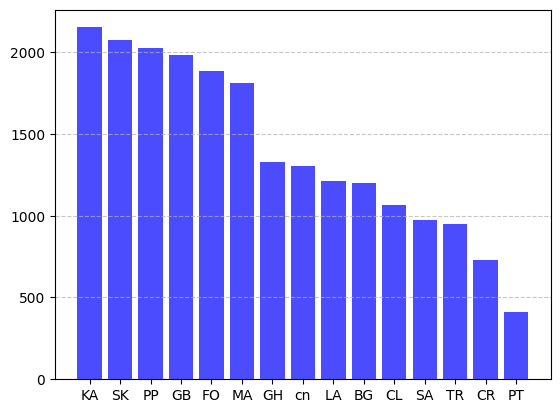

In [379]:
def ApplyOthers(pd_data, limit):
    OthersDF = {"Others": pd_data.iloc[limit:].sum()}
    return pd.concat([pd_data.iloc[:limit], pd.Series(OthersDF)])

Moy_Points_Sum_by_WorkCountry = pd.concat([data["Points_Sum"], data["WORK_COUNTRY"]], axis=1).groupby("WORK_COUNTRY")["Points_Sum"].mean().sort_values(ascending=False)
Barchart(ApplyOthers(Moy_Points_Sum_by_WorkCountry, 15), "", "", "")
Barchart(Moy_Points_Sum_by_WorkCountry.iloc[Moy_Points_Sum_by_WorkCountry.count() - 15:], "", "", "")

Camembert : Average Points_Sum by GENDER or WORK_COUNTRY (percentages)

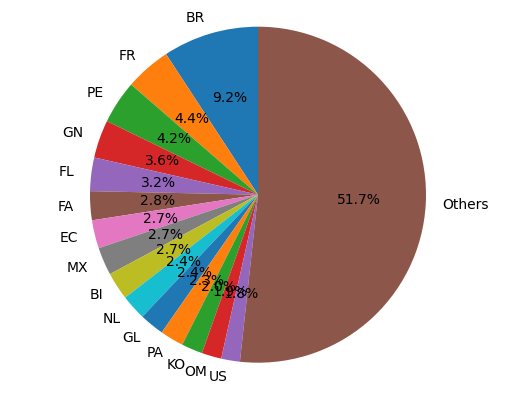

In [380]:
PieChart(ApplyOthers(Moy_Points_Sum_by_WorkCountry, 15), "")

Courbes Temporelles : description

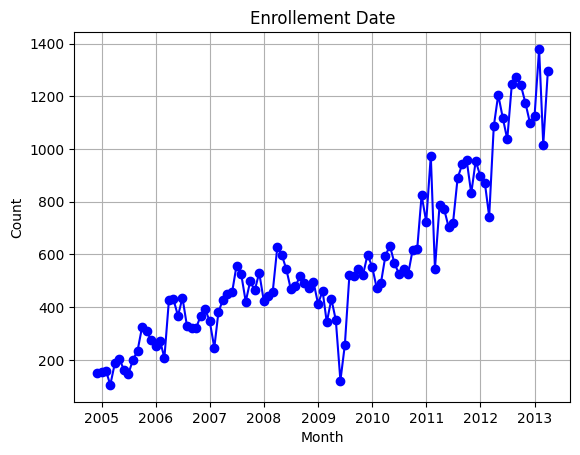

In [381]:
data["FFP_DATE"] = pd.to_datetime(data["FFP_DATE"])
firstFlight_Count = data.groupby(pd.Grouper(key="FFP_DATE", freq="M")).size().reset_index(name="COUNT")
firstFlight_Count.columns = ["FFP_DATE", "COUNT"]

TimePlot(firstFlight_Count, "FFP_DATE", "COUNT", "Enrollement Date", "Month", "Count")

Courbes Temporelle : description

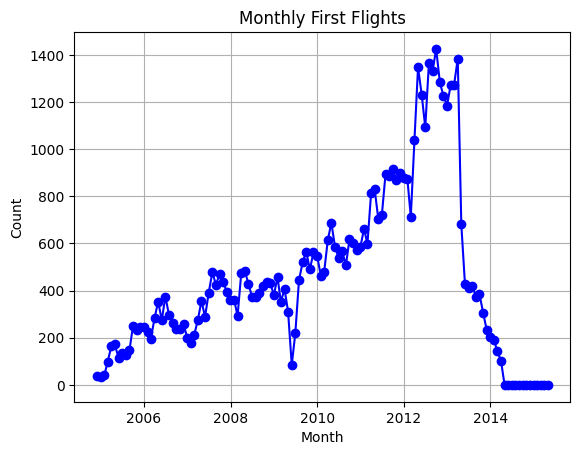

In [382]:
data["FIRST_FLIGHT_DATE"] = pd.to_datetime(data["FIRST_FLIGHT_DATE"])
firstFlight_Count = data.groupby(pd.Grouper(key="FIRST_FLIGHT_DATE", freq="M")).size().reset_index(name="COUNT")
firstFlight_Count.columns = ["FIRST_FLIGHT_DATE", "COUNT"]

TimePlot(firstFlight_Count, "FIRST_FLIGHT_DATE", "COUNT", "Monthly First Flights", "Month", "Count")

Courbe Temporelle : description

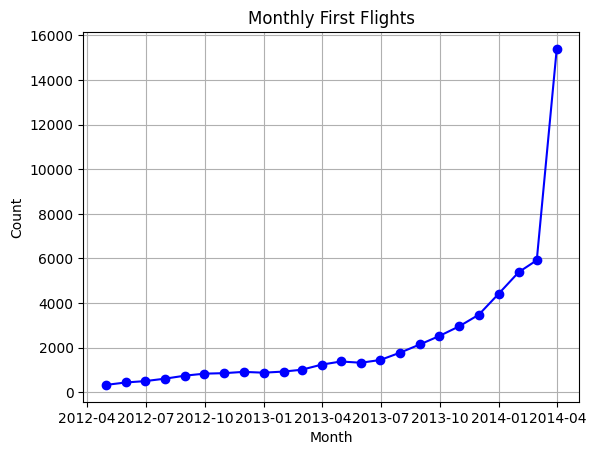

In [383]:
data["LAST_FLIGHT_DATE"] = pd.to_datetime(data["LAST_FLIGHT_DATE"])
firstFlight_Count = data.groupby(pd.Grouper(key="LAST_FLIGHT_DATE", freq="M")).size().reset_index(name="COUNT")
firstFlight_Count.columns = ["LAST_FLIGHT_DATE", "COUNT"]

TimePlot(firstFlight_Count, "LAST_FLIGHT_DATE", "COUNT", "Monthly First Flights", "Month", "Count")